[View in Colaboratory](https://colab.research.google.com/github/henrywang1/AI-practice/blob/master/cifar10_tensorflow.ipynb)

## This notebook is modfied by [Udacity deeplearning courses github](https://github.com/udacity/deep-learning)

# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
!wget https://raw.githubusercontent.com/udacity/deep-learning/master/image-classification/helper.py
!wget https://raw.githubusercontent.com/udacity/deep-learning/master/image-classification/problem_unittests.py

--2018-05-05 15:06:43--  https://raw.githubusercontent.com/udacity/deep-learning/master/image-classification/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5631 (5.5K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   5.50K  --.-KB/s    in 0s      

2018-05-05 15:06:43 (34.4 MB/s) - ‘helper.py’ saved [5631/5631]

--2018-05-05 15:06:44--  https://raw.githubusercontent.com/udacity/deep-learning/master/image-classification/problem_unittests.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7319 (

In [2]:
!pip install tqdm

In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile


cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()

tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 3:
Image - Min Value: 4 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


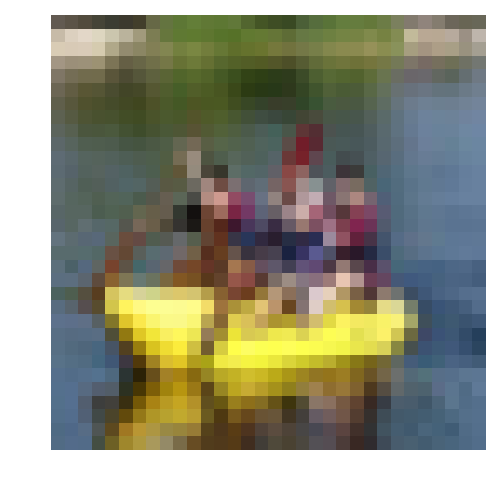

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# 更改 batch_id, sample_id 看不同的圖片資料
batch_id = 2
sample_id =3
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions

接下來的練習，都需要你按照需求寫出對應的 function。寫完後執行 cell 會對你寫好的 function 做測試，如果正確就會出現 **Tests Passed**，若是不正確則會看到 **Assert error**，代表沒有寫出符合要求的 function，就請大家練習看看，有任何問題歡迎隨時詢問助教！
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [5]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return np.array(x / np.max(x))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [6]:
import pandas as pd
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    # HINT: google "np.eye" or use label encoder from sklearn
    print(len(x))
    return np.eye(10)[x]


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

544
5
Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

9000
9000
9000
9000
9000
5000
10000


# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
以下的練習希望大家透過比較 high level 的 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers)packages  來完成 convolution, pooling 等操作，讓各位試著用自己的架構建出一個簡單的 CNN，完成 cifar-10 資料集的練習
Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [9]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    # 請命名為 x
    image = tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]], name='x')
    return image 


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    # 請命名為 y
    label = tf.placeholder(tf.float32, [None, n_classes], name='y')
    return label


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    # 請命名為 keep_prob
    keep_prob = tf.placeholder(tf.float32, name="keep_prob" )
    return keep_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Apply a convolution to `x_tensor` using ** tf.layers.conv2d**.
    * We recommend you use same padding, but you're welcome to use any padding.
    * You need to add a nonlinear activation into the convolution. e.g. tf.nn.relu
* Apply Max Pooling using **tf.layers.max_pooling2d**
    * We recommend you use same padding, but you're welcome to use any padding.


In [10]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function

    conv_layer = tf.layers.conv2d(x_tensor, conv_num_outputs, kernel_size=conv_ksize, strides=conv_strides, activation=tf.nn.relu)   
    conv_layer = tf.layers.max_pooling2d(conv_layer, pool_size=pool_ksize, strides=pool_strides)

    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*).  you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers)

In [11]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    # HINT: tf.layers.flatten
    return tf.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers)

In [12]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # HINT: tf.layers.dense, remember to use non-linear activation function

    return tf.layers.dense(x_tensor, num_outputs, activation=tf.nn.relu)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

#### **Note:** Activation, softmax, or cross entropy should **not** be applied to this.
#### 此 output function 只是要將 layer 的結果 output 出來，不需要加上任何 activation function

In [13]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # HINT: use tf.layers.dense and check how to use linear activation in tensorflow
    return tf.layers.dense(x_tensor, num_outputs, activation=None)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [14]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # 如同先前提到的 kernel (filter) size、strides 等等都是可以調整的參數，請自由調整看看是否對結果會有影響
    # 每次 convolution 要使用的 filters 數量也是可以調整的
    conv_ksize = (3,3)
    conv_strides = (1,1)
    pool_ksize = (2,2)
    pool_strides = (2,2)
    n_filters_1 = 64
    n_filters_2 = 128
    
    conv_1 = conv2d_maxpool(x, n_filters_1, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv_2 = conv2d_maxpool(conv_1, n_filters_1, conv_ksize, conv_strides, pool_ksize, pool_strides)


    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    fc = flatten(conv_2)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    fc1 = fully_conn(fc, 300)
    
    # apply dropout
    fc2 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    out = output(fc2, 10)
    
    # TODO: return output
    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

#底下的 code 會把整個 network 的 graph 建置起來，之後再透過 session.run 把我們的資料放進模型中訓練

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model 的 output (注意！這時候還沒有經過 softmax function，這些 output 的值通常稱為 logits)
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
# 此時透過 softmax_cross_entropy_with_logits 將 model output 的值經過 softmax，再與我們的 label 計算 cross-entropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [15]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={
    x: feature_batch,
    y: label_batch,
    keep_prob: keep_probability})



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [0]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict = {
            x: feature_batch,
            y: label_batch,
            keep_prob: 1.
        })
    valid_acc = session.run(accuracy, feed_dict = {
            x: valid_features,
            y: valid_labels,
            keep_prob: 1.
        })
    print('Epoch {:>2}'
          'Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
        epoch + 1,
        loss,
        valid_acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [0]:
# TODO: Tune Parameters
epochs = 50
batch_size = 128
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Epoch  1Loss:     2.0310 Validation Accuracy: 0.380800
Epoch  2, CIFAR-10 Batch 1:  Epoch  2Loss:     1.7669 Validation Accuracy: 0.438600
Epoch  3, CIFAR-10 Batch 1:  Epoch  3Loss:     1.5239 Validation Accuracy: 0.470200
Epoch  4, CIFAR-10 Batch 1:  Epoch  4Loss:     1.3752 Validation Accuracy: 0.507000
Epoch  5, CIFAR-10 Batch 1:  Epoch  5Loss:     1.2876 Validation Accuracy: 0.525800
Epoch  6, CIFAR-10 Batch 1:  Epoch  6Loss:     1.1370 Validation Accuracy: 0.545000
Epoch  7, CIFAR-10 Batch 1:  Epoch  7Loss:     1.0163 Validation Accuracy: 0.545200
Epoch  8, CIFAR-10 Batch 1:  Epoch  8Loss:     0.9926 Validation Accuracy: 0.565800
Epoch  9, CIFAR-10 Batch 1:  Epoch  9Loss:     0.8363 Validation Accuracy: 0.570800
Epoch 10, CIFAR-10 Batch 1:  Epoch 10Loss:     0.7921 Validation Accuracy: 0.571800
Epoch 11, CIFAR-10 Batch 1:  Epoch 11Loss:     0.7343 Validation Accuracy: 0.569800
Epoch 12, CIFAR-10 Batch 1:  Epoc

Epoch 48, CIFAR-10 Batch 1:  Epoch 48Loss:     0.0136 Validation Accuracy: 0.593600
Epoch 49, CIFAR-10 Batch 1:  Epoch 49Loss:     0.0044 Validation Accuracy: 0.599200
Epoch 50, CIFAR-10 Batch 1:  Epoch 50Loss:     0.0031 Validation Accuracy: 0.597200


### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)
    print('-----model save ------')

Training...
Epoch  1, CIFAR-10 Batch 1:  Epoch  1Loss:     2.0074 Validation Accuracy: 0.399800
Epoch  1, CIFAR-10 Batch 2:  Epoch  1Loss:     1.4897 Validation Accuracy: 0.420800
Epoch  1, CIFAR-10 Batch 3:  Epoch  1Loss:     1.2450 Validation Accuracy: 0.486000
Epoch  1, CIFAR-10 Batch 4:  Epoch  1Loss:     1.3563 Validation Accuracy: 0.499200
Epoch  1, CIFAR-10 Batch 5:  Epoch  1Loss:     1.3768 Validation Accuracy: 0.552600
Epoch  2, CIFAR-10 Batch 1:  Epoch  2Loss:     1.4096 Validation Accuracy: 0.563800
Epoch  2, CIFAR-10 Batch 2:  Epoch  2Loss:     1.1259 Validation Accuracy: 0.526600
Epoch  2, CIFAR-10 Batch 3:  Epoch  2Loss:     0.9492 Validation Accuracy: 0.578600
Epoch  2, CIFAR-10 Batch 4:  Epoch  2Loss:     1.0144 Validation Accuracy: 0.602200
Epoch  2, CIFAR-10 Batch 5:  Epoch  2Loss:     1.0745 Validation Accuracy: 0.619000
Epoch  3, CIFAR-10 Batch 1:  Epoch  3Loss:     1.0288 Validation Accuracy: 0.625200
Epoch  3, CIFAR-10 Batch 2:  Epoch  3Loss:     0.8497 Validation

Epoch 10, CIFAR-10 Batch 4:  Epoch 10Loss:     0.2749 Validation Accuracy: 0.702200
Epoch 10, CIFAR-10 Batch 5:  Epoch 10Loss:     0.2523 Validation Accuracy: 0.700000
Epoch 11, CIFAR-10 Batch 1:  Epoch 11Loss:     0.2678 Validation Accuracy: 0.707200
Epoch 11, CIFAR-10 Batch 2:  Epoch 11Loss:     0.2185 Validation Accuracy: 0.718400
Epoch 11, CIFAR-10 Batch 3:  Epoch 11Loss:     0.1913 Validation Accuracy: 0.674400
Epoch 11, CIFAR-10 Batch 4:  Epoch 11Loss:     0.2089 Validation Accuracy: 0.715000
Epoch 11, CIFAR-10 Batch 5:  Epoch 11Loss:     0.2012 Validation Accuracy: 0.705000
Epoch 12, CIFAR-10 Batch 1:  Epoch 12Loss:     0.2172 Validation Accuracy: 0.703800
Epoch 12, CIFAR-10 Batch 2:  Epoch 12Loss:     0.1835 Validation Accuracy: 0.706800
Epoch 12, CIFAR-10 Batch 3:  Epoch 12Loss:     0.1696 Validation Accuracy: 0.706800
Epoch 12, CIFAR-10 Batch 4:  Epoch 12Loss:     0.2077 Validation Accuracy: 0.721600
Epoch 12, CIFAR-10 Batch 5:  Epoch 12Loss:     0.1704 Validation Accuracy: 0

Epoch 20, CIFAR-10 Batch 2:  Epoch 20Loss:     0.0555 Validation Accuracy: 0.717200
Epoch 20, CIFAR-10 Batch 3:  Epoch 20Loss:     0.0688 Validation Accuracy: 0.716600
Epoch 20, CIFAR-10 Batch 4:  Epoch 20Loss:     0.0784 Validation Accuracy: 0.709400
Epoch 20, CIFAR-10 Batch 5:  Epoch 20Loss:     0.0483 Validation Accuracy: 0.735000
Epoch 21, CIFAR-10 Batch 1:  Epoch 21Loss:     0.0699 Validation Accuracy: 0.713200
Epoch 21, CIFAR-10 Batch 2:  Epoch 21Loss:     0.0352 Validation Accuracy: 0.724800
Epoch 21, CIFAR-10 Batch 3:  Epoch 21Loss:     0.0595 Validation Accuracy: 0.711400
Epoch 21, CIFAR-10 Batch 4:  Epoch 21Loss:     0.0511 Validation Accuracy: 0.714200
Epoch 21, CIFAR-10 Batch 5:  Epoch 21Loss:     0.0481 Validation Accuracy: 0.724600
Epoch 22, CIFAR-10 Batch 1:  Epoch 22Loss:     0.0519 Validation Accuracy: 0.719200
Epoch 22, CIFAR-10 Batch 2:  Epoch 22Loss:     0.0276 Validation Accuracy: 0.728200
Epoch 22, CIFAR-10 Batch 3:  Epoch 22Loss:     0.0512 Validation Accuracy: 0

Epoch 29, CIFAR-10 Batch 5:  Epoch 29Loss:     0.0163 Validation Accuracy: 0.721800
Epoch 30, CIFAR-10 Batch 1:  Epoch 30Loss:     0.0165 Validation Accuracy: 0.721400
Epoch 30, CIFAR-10 Batch 2:  Epoch 30Loss:     0.0101 Validation Accuracy: 0.723000
Epoch 30, CIFAR-10 Batch 3:  Epoch 30Loss:     0.0210 Validation Accuracy: 0.725600
Epoch 30, CIFAR-10 Batch 4:  Epoch 30Loss:     0.0165 Validation Accuracy: 0.721200
Epoch 30, CIFAR-10 Batch 5:  Epoch 30Loss:     0.0144 Validation Accuracy: 0.711000
Epoch 31, CIFAR-10 Batch 1:  Epoch 31Loss:     0.0136 Validation Accuracy: 0.712400
Epoch 31, CIFAR-10 Batch 2:  Epoch 31Loss:     0.0095 Validation Accuracy: 0.720200
Epoch 31, CIFAR-10 Batch 3:  Epoch 31Loss:     0.0166 Validation Accuracy: 0.716000
Epoch 31, CIFAR-10 Batch 4:  Epoch 31Loss:     0.0262 Validation Accuracy: 0.716800
Epoch 31, CIFAR-10 Batch 5:  Epoch 31Loss:     0.0097 Validation Accuracy: 0.720000
Epoch 32, CIFAR-10 Batch 1:  Epoch 32Loss:     0.0117 Validation Accuracy: 0

Epoch 39, CIFAR-10 Batch 3:  Epoch 39Loss:     0.0070 Validation Accuracy: 0.713200
Epoch 39, CIFAR-10 Batch 4:  Epoch 39Loss:     0.0106 Validation Accuracy: 0.716600
Epoch 39, CIFAR-10 Batch 5:  Epoch 39Loss:     0.0040 Validation Accuracy: 0.723200
Epoch 40, CIFAR-10 Batch 1:  Epoch 40Loss:     0.0153 Validation Accuracy: 0.715200
Epoch 40, CIFAR-10 Batch 2:  Epoch 40Loss:     0.0078 Validation Accuracy: 0.714000
Epoch 40, CIFAR-10 Batch 3:  Epoch 40Loss:     0.0104 Validation Accuracy: 0.715000
Epoch 40, CIFAR-10 Batch 4:  Epoch 40Loss:     0.0042 Validation Accuracy: 0.715200
Epoch 40, CIFAR-10 Batch 5:  Epoch 40Loss:     0.0028 Validation Accuracy: 0.718200
Epoch 41, CIFAR-10 Batch 1:  Epoch 41Loss:     0.0113 Validation Accuracy: 0.715800
Epoch 41, CIFAR-10 Batch 2:  Epoch 41Loss:     0.0057 Validation Accuracy: 0.711000
Epoch 41, CIFAR-10 Batch 3:  Epoch 41Loss:     0.0098 Validation Accuracy: 0.716800
Epoch 41, CIFAR-10 Batch 4:  Epoch 41Loss:     0.0072 Validation Accuracy: 0

Epoch 49, CIFAR-10 Batch 1:  Epoch 49Loss:     0.0040 Validation Accuracy: 0.722000
Epoch 49, CIFAR-10 Batch 2:  Epoch 49Loss:     0.0028 Validation Accuracy: 0.717400
Epoch 49, CIFAR-10 Batch 3:  Epoch 49Loss:     0.0028 Validation Accuracy: 0.719000
Epoch 49, CIFAR-10 Batch 4:  Epoch 49Loss:     0.0083 Validation Accuracy: 0.712000
Epoch 49, CIFAR-10 Batch 5:  Epoch 49Loss:     0.0038 Validation Accuracy: 0.717000
Epoch 50, CIFAR-10 Batch 1:  Epoch 50Loss:     0.0045 Validation Accuracy: 0.714600
Epoch 50, CIFAR-10 Batch 2:  Epoch 50Loss:     0.0012 Validation Accuracy: 0.711600
Epoch 50, CIFAR-10 Batch 3:  Epoch 50Loss:     0.0024 Validation Accuracy: 0.718600
Epoch 50, CIFAR-10 Batch 4:  Epoch 50Loss:     0.0039 Validation Accuracy: 0.712600
Epoch 50, CIFAR-10 Batch 5:  Epoch 50Loss:     0.0039 Validation Accuracy: 0.719600
-----model save ------


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7182555379746836



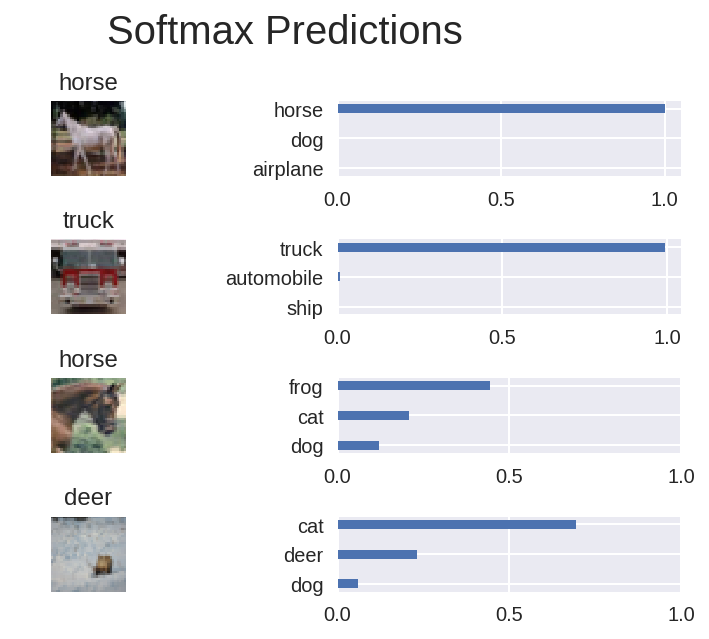

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might follow the CNN stucture where people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).

## 做完練習後，請執行以下 cell 來刪除圖片檔案，避免各位的硬碟空間不足 !! (可能會開不了 hub)

In [0]:
!rm cifar-10-python.tar.gz
!rm preprocess_batch_1.p
!rm preprocess_batch_2.p
!rm preprocess_batch_3.p
!rm preprocess_batch_4.p
!rm preprocess_batch_5.p
!rm preprocess_validation.p
!rm preprocess_test.p